# MACHINE LEARNING TP EVALUATION

In [1]:
# Imports
import pandas as pd
import numpy as np
from mixed_naive_bayes import MixedNB

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:

# Import the dataset
df = pd.read_csv("breast-cancer_csv.csv")
#original shape (286,10)
#drop the missing values, 
df.dropna()
df.head()


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [4]:
df.shape

(286, 10)

In [5]:
x = df.iloc[:,0:9]
y = df.iloc[:,-1]

In [6]:
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=0)
#x_train.shape

In [6]:
# display categorical variables
categorical = [col for col in x.columns if x[col].dtypes == 'O']
categorical

['age',
 'menopause',
 'tumor-size',
 'inv-nodes',
 'node-caps',
 'breast',
 'breast-quad',
 'irradiat']

In [7]:
#display numerical variables

numerical = [col for col in x.columns if x[col].dtypes != 'O']

numerical

['deg-malig']

In [8]:
# print percentage of missing values in the categorical variables in training set

x[categorical].isnull().mean()

age            0.000000
menopause      0.000000
tumor-size     0.000000
inv-nodes      0.000000
node-caps      0.027972
breast         0.000000
breast-quad    0.003497
irradiat       0.000000
dtype: float64

In [9]:
# print categorical variables with missing data
for col in categorical:
    if x[col].isnull().mean()>0:
        print(col, (x[col].isnull().mean()))

node-caps 0.027972027972027972
breast-quad 0.0034965034965034965


In [10]:
#replace the missing values with the most frequent one
for df2 in [x]:
    df2['node-caps'].fillna(x['node-caps'].mode()[0], inplace=True)
    df2['breast-quad'].fillna(x['breast-quad'].mode()[0], inplace=True)

In [11]:
# check missing values in categorical variables in X_train

x[categorical].isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [12]:
x[numerical].isnull().sum()

deg-malig    0
dtype: int64

In [13]:
#Encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for c in categorical:
    x[c]= label_encoder.fit_transform(x[c])
y=label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))
print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")

Mapping of Label Encoded Classes
{'no-recurrence-events': 0, 'recurrence-events': 1}


In [14]:
x.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,2,2,2,0,1,3,1,2,0
1,3,0,2,0,0,1,1,0,0
2,3,0,6,0,0,2,0,1,0
3,2,2,6,0,1,3,1,1,1
4,2,2,5,4,1,2,0,4,0


In [15]:
y

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

# K-Cross Validation

In [16]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'].mean(),
              "Training Precision scores": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'].mean(),
              "Validation Precision scores": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'].mean(),
              }

In [17]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.10000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

# MIXED NAIVE BAYES

In [20]:
nb_model= MixedNB(categorical_features=[0,1,2,3,4,6,7,8])

In [21]:
nb_model.fit(x_train,y_train)

MixedNB(alpha=0.5, var_smoothing=1e-09)

In [22]:
y_pred=nb_model.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0])

In [23]:
nb_model.score(x_test, y_test)

0.7473684210526316

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[59  9]
 [15 12]]


<AxesSubplot:>

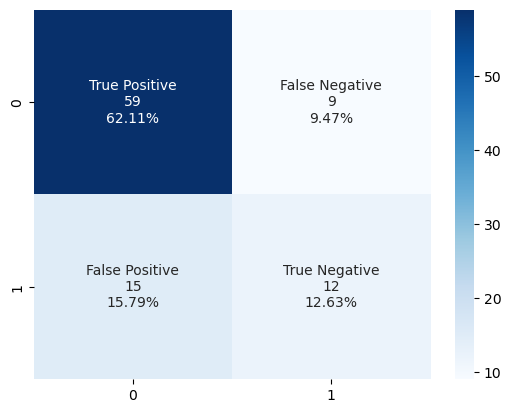

In [25]:
import seaborn as sns
group_names = ['True Positive','False Negative','False Positive','True Negative']
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#support is the total 0s and 1s in the dataset
#precision=TP+TN/(TP+FP)
#recall=TP/(TP+FN)
#accuracy=TP/(TP+TN+FP+FN)
#F1-SCORE=2*(Recall * Precision) / (Recall + Precision)
#MACRO AVG FOR PRECISION(THATS AN EX)=MEAN==>(PRECISION OF 0+ PRECISION OF 1) /2 
#weighted avg=((0.80*68)+(0.57*27))/(68+27)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        68
           1       0.57      0.44      0.50        27

    accuracy                           0.75        95
   macro avg       0.68      0.66      0.67        95
weighted avg       0.73      0.75      0.74        95



In [27]:
nb_result = cross_validation(nb_model, x, y, 5)
print(nb_result)

{'Training Accuracy scores': 0.7526354094844098, 'Training Precision scores': 0.5990574212093017, 'Training Recall scores': 0.5113261698010488, 'Training F1 scores': 0.5512855335121227, 'Validation Accuracy scores': 0.7135511191772534, 'Validation Precision scores': 0.5341176470588236, 'Validation Recall scores': 0.4536019536019536, 'Validation F1 scores': 0.4806204424669386}


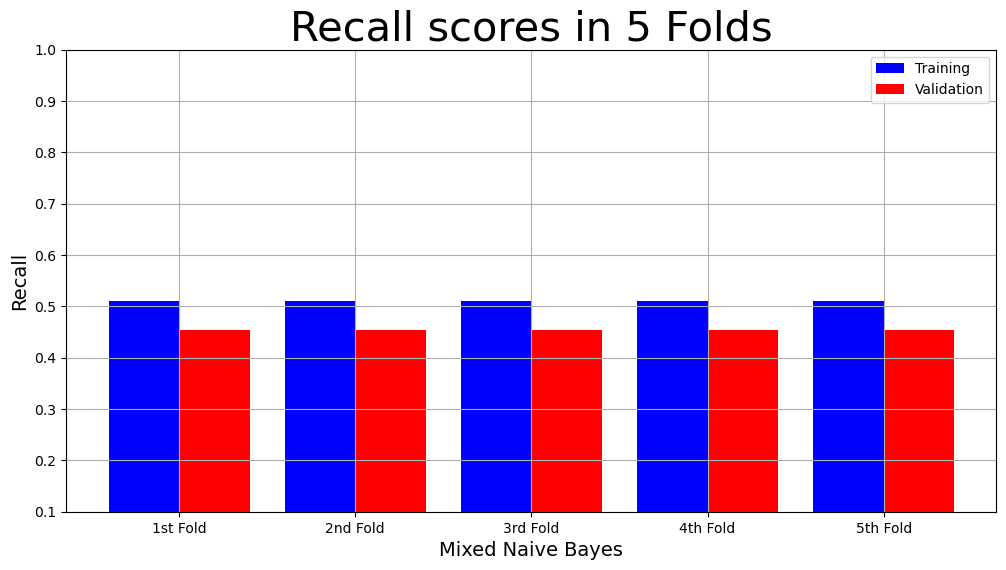

In [28]:
import matplotlib.pyplot as plt
model_name = "Mixed Naive Bayes"
plot_result(model_name,
            "Recall",
            "Recall scores in 5 Folds",
            nb_result["Training Recall scores"],
            nb_result["Validation Recall scores"])

# DECISION TREE

In [29]:
#training the model with decision tree
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion="entropy",
                                     random_state=0)
decision_tree_model.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
y_predict=decision_tree_model.predict(x_test)
y_predict

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0])

In [31]:
decision_tree_model.score(x_test, y_test)

0.6631578947368421

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix_tree=confusion_matrix(y_test, y_predict)
confusion_matrix_tree

array([[50, 18],
       [14, 13]])

<AxesSubplot:>

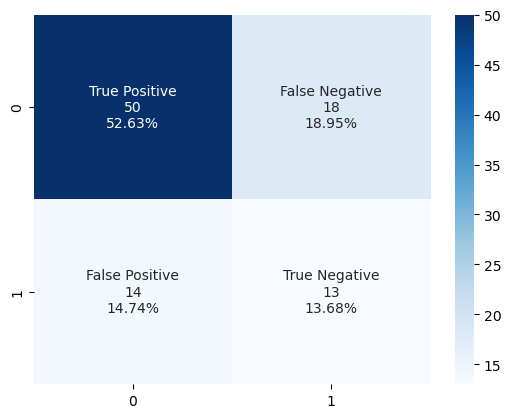

In [33]:
import seaborn as sns
group_names = ['True Positive','False Negative','False Positive','True Negative']
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_tree.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_tree.flatten()/np.sum(confusion_matrix_tree)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix_tree, annot=labels, fmt='', cmap='Blues')

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        68
           1       0.42      0.48      0.45        27

    accuracy                           0.66        95
   macro avg       0.60      0.61      0.60        95
weighted avg       0.68      0.66      0.67        95



In [35]:
decision_tree_result = cross_validation(decision_tree_model, x, y, 5)
print(decision_tree_result)

{'Training Accuracy scores': 0.9833869608519115, 'Training Precision scores': 0.9938927738927739, 'Training Recall scores': 0.95, 'Training F1 scores': 0.9714278913022039, 'Validation Accuracy scores': 0.6046581972171808, 'Validation Precision scores': 0.35621345029239765, 'Validation Recall scores': 0.38823529411764707, 'Validation F1 scores': 0.3706819875240928}


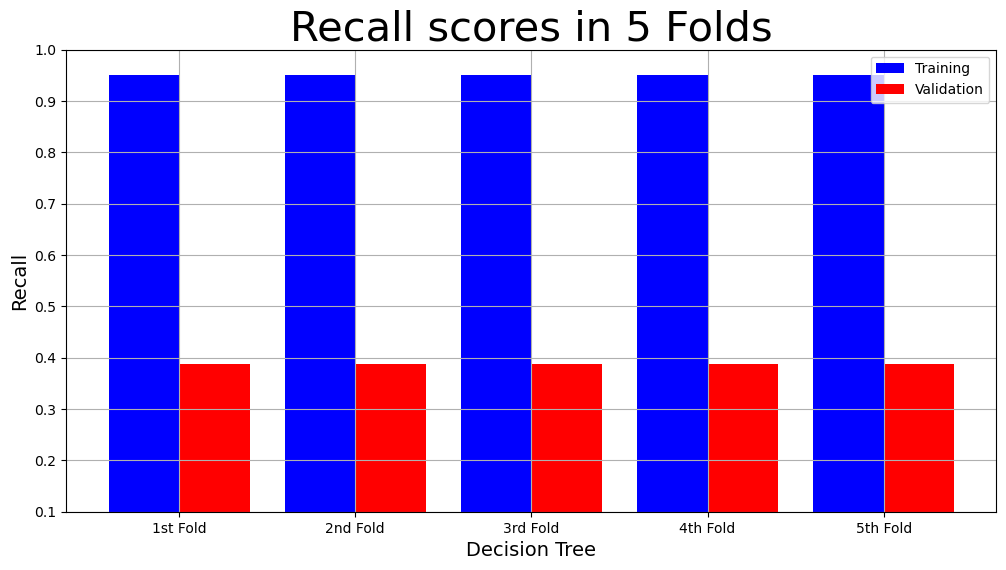

In [36]:
model_name = "Decision Tree"
plot_result(model_name,
            "Recall",
            "Recall scores in 5 Folds",
            decision_tree_result["Training Recall scores"],
            decision_tree_result["Validation Recall scores"])

[Text(0.6196933962264151, 0.9722222222222222, 'X[3] <= 0.5\nentropy = 0.886\nsamples = 191\nvalue = [133, 58]'),
 Text(0.3431603773584906, 0.9166666666666666, 'X[2] <= 2.5\nentropy = 0.76\nsamples = 141\nvalue = [110, 31]'),
 Text(0.1320754716981132, 0.8611111111111112, 'X[0] <= 2.5\nentropy = 0.454\nsamples = 42\nvalue = [38, 4]'),
 Text(0.11320754716981132, 0.8055555555555556, 'X[4] <= 0.5\nentropy = 0.764\nsamples = 18\nvalue = [14, 4]'),
 Text(0.09433962264150944, 0.75, 'X[2] <= 1.5\nentropy = 0.672\nsamples = 17\nvalue = [14, 3]'),
 Text(0.05660377358490566, 0.6944444444444444, 'X[0] <= 1.5\nentropy = 0.439\nsamples = 11\nvalue = [10, 1]'),
 Text(0.03773584905660377, 0.6388888888888888, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.018867924528301886, 0.5833333333333334, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05660377358490566, 0.5833333333333334, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07547169811320754, 0.6388888888888888, 'en

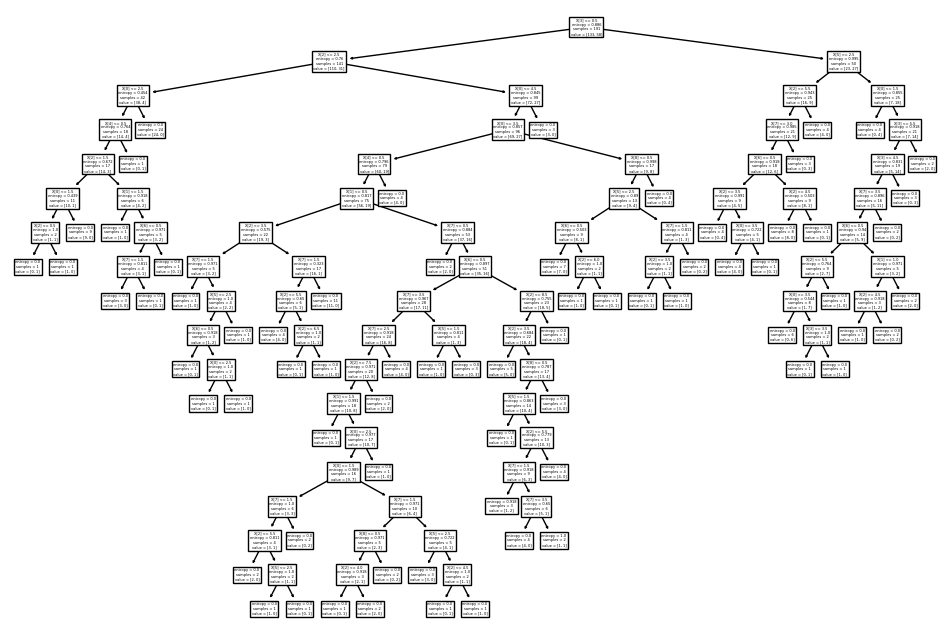

In [37]:

plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(decision_tree_model.fit(x_train, y_train)) 

# K-Nearest Neighbors (KNN)

In [38]:
#normalisation
from sklearn.preprocessing import scale
for col in x:
    x[col] = scale(x[col])

In [39]:
x.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,-0.657727,0.940728,-0.960657,-0.555623,2.026609,1.290564,1.065049,0.202891,-0.558504
1,0.332325,-1.089825,-0.960657,-0.555623,-0.493435,-1.423416,1.065049,-1.639234,-0.558504
2,0.332325,-1.089825,0.902041,-0.555623,-0.493435,-0.066426,-0.938924,-0.718171,-0.558504
3,-0.657727,0.940728,0.902041,-0.555623,2.026609,1.290564,1.065049,-0.718171,1.790498
4,-0.657727,0.940728,0.436366,1.514841,2.026609,-0.066426,-0.938924,2.045017,-0.558504


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train, y_train)
y_prediction = knn_clf.predict(x_test)

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix_knn=confusion_matrix(y_test, y_prediction)
confusion_matrix_knn

array([[54, 14],
       [17, 10]])

<AxesSubplot:>

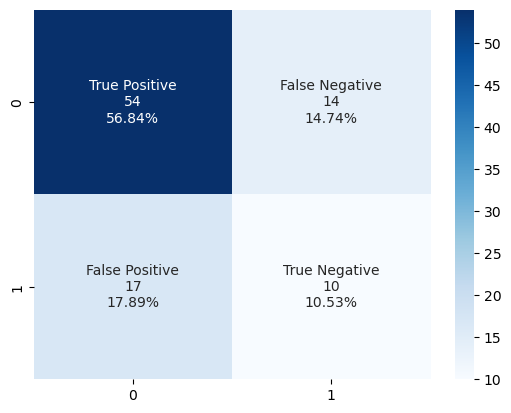

In [43]:
import seaborn as sns
group_names = ['True Positive','False Negative','False Positive','True Negative']
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_knn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_knn.flatten()/np.sum(confusion_matrix_knn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix_knn, annot=labels, fmt='', cmap='Blues')

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        68
           1       0.42      0.37      0.39        27

    accuracy                           0.67        95
   macro avg       0.59      0.58      0.58        95
weighted avg       0.66      0.67      0.67        95



In [45]:
knn_result = cross_validation(knn_clf, x_train, y_train, 5)
print(knn_result)

{'Training Accuracy scores': 0.8232886136910904, 'Training Precision scores': 0.8205844155844156, 'Training Recall scores': 0.5387604070305273, 'Training F1 scores': 0.645858514512747, 'Validation Accuracy scores': 0.6805668016194331, 'Validation Precision scores': 0.47333333333333333, 'Validation Recall scores': 0.3787878787878788, 'Validation F1 scores': 0.4190704032809296}


In [46]:
from sklearn import metrics
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)
# We can create Python dictionary using [] or dict()
scores = []
# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

[0.6631578947368421, 0.7473684210526316, 0.6736842105263158, 0.7368421052631579, 0.7368421052631579, 0.7473684210526316, 0.7368421052631579, 0.7157894736842105, 0.7368421052631579, 0.7578947368421053, 0.7368421052631579, 0.7368421052631579, 0.7368421052631579, 0.7473684210526316, 0.7684210526315789, 0.7578947368421053, 0.7684210526315789, 0.8, 0.7894736842105263, 0.8, 0.8, 0.7789473684210526, 0.8, 0.8105263157894737, 0.8105263157894737]


Text(0, 0.5, 'Testing Accuracy')

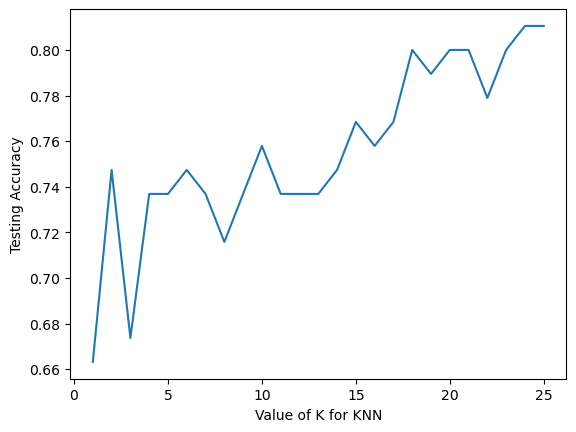

In [47]:

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# Support Vector Machines (SVM)

In [48]:
from sklearn.svm import SVC
svc_clf=SVC()
svc_clf.fit(x_train,y_train)
y_pred=svc_clf.predict(x_test)

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix_svm=confusion_matrix(y_test, y_pred)
confusion_matrix_svm

array([[62,  6],
       [17, 10]])

<AxesSubplot:>

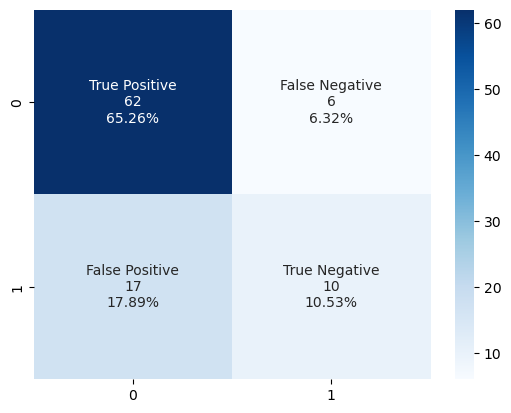

In [50]:
import seaborn as sns
group_names = ['True Positive','False Negative','False Positive','True Negative']
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_svm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_svm.flatten()/np.sum(confusion_matrix_svm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix_svm, annot=labels, fmt='', cmap='Blues')

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        68
           1       0.62      0.37      0.47        27

    accuracy                           0.76        95
   macro avg       0.70      0.64      0.65        95
weighted avg       0.74      0.76      0.74        95



In [52]:
svc_result = cross_validation(svc_clf, x_train, y_train, 5)
print(svc_result)

{'Training Accuracy scores': 0.8049707602339181, 'Training Precision scores': 0.8898680033416875, 'Training Recall scores': 0.4096207215541166, 'Training F1 scores': 0.5589067381113777, 'Validation Accuracy scores': 0.73306342780027, 'Validation Precision scores': 0.5944444444444444, 'Validation Recall scores': 0.25757575757575757, 'Validation F1 scores': 0.3500280112044818}


# Saving the model with pickle

In [53]:
#saving the models to disk
import pickle
pickle.dump(nb_model, open('model_naive_bayes_mixed.pkl', 'wb'))
pickle.dump(svc_clf, open('model_svm.pkl', 'wb'))
pickle.dump(knn_clf, open('model_knn.pkl', 'wb'))
pickle.dump(decision_tree_model, open('model_decision_tree.pkl', 'wb'))

In [ ]:
#load the model from disk
loaded_model = pickle.load(open('model_naive_bayes_mixed.pkl', 'rb'))
loaded_model.score(x_test, y_test)